In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes in CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 43s 862us/sample - loss: 1.5090 - accuracy: 0.4512 - val_loss: 1.2191 - val_accuracy: 0.5628
Epoch 2/10
50000/50000 [==============================] - 42s 836us/sample - loss: 1.1471 - accuracy: 0.5926 - val_loss: 1.0566 - val_accuracy: 0.6247
Epoch 3/10
50000/50000 [==============================] - 41s 828us/sample - loss: 0.9996 - accuracy: 0.6449 - val_loss: 1.0367 - val_accuracy: 0.6372
Epoch 4/10
50000/50000 [==============================] - 43s 860us/sample - loss: 0.9001 - accuracy: 0.6838 - val_loss: 0.9161 - val_accuracy: 0.6831
Epoch 5/10
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.8306 - accuracy: 0.7081 - val_loss: 0.8688 - val_accuracy: 0.6953
Epoch 6/10
50000/50000 [==============================] - 119s 2ms/sample - loss: 0.7714 - accuracy: 0.7285 - val_loss: 0.8721 - val_accuracy: 0.6943
Epoch 7/10
50000/50000 [======================

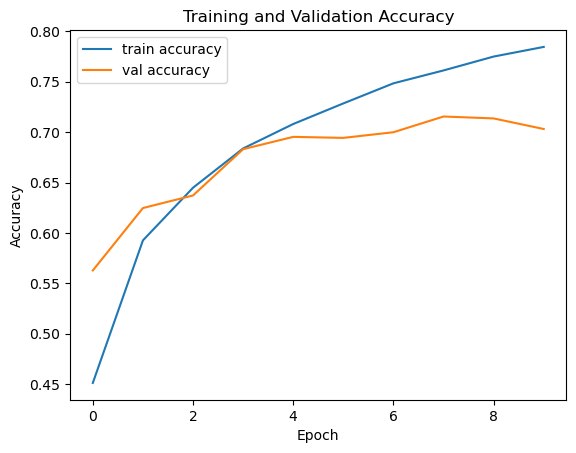

In [2]:
# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
